In [6]:
# Autoencoder for Image Denoising using PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [8]:
# Transform: Normalize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [9]:
# Load MNIST dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [10]:
# Add noise to images
def add_noise(inputs, noise_factor=0.5):
    noisy = inputs + noise_factor * torch.randn_like(inputs)
    return torch.clamp(noisy, 0., 1.)


In [11]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # [B, 16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # [B, 32, 7, 7]
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, output_padding=1, padding=1), # [B, 16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, output_padding=1, padding=1),  # [B, 1, 28, 28]
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [12]:
# Initialize model, loss function and optimizer
model = DenoisingAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [18]:
# Train the autoencoder
def train(model, loader, criterion, optimizer, epochs=5):
    model.train()
    print("Name: ")
    print("Register Number: ")
    for epoch in range(epochs):
        running_loss = 0.0
        for images, _ in loader:
            images = images.to(device)
            noisy_images = add_noise(images).to(device)

            # Forward pass
            outputs = model(noisy_images)
            loss = criterion(outputs, images)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader):.4f}")


In [19]:
# Evaluate and visualize
def visualize_denoising(model, loader, num_images=10):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            noisy_images = add_noise(images).to(device)
            outputs = model(noisy_images)
            break

    images = images.cpu().numpy()
    noisy_images = noisy_images.cpu().numpy()
    outputs = outputs.cpu().numpy()

    print("Name: ")
    print("Register Number: ")
    plt.figure(figsize=(18, 6))
    for i in range(num_images):
        # Original
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title("Original")
        plt.axis("off")

        # Noisy
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(noisy_images[i].squeeze(), cmap='gray')
        ax.set_title("Noisy")
        plt.axis("off")

        # Denoised
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(outputs[i].squeeze(), cmap='gray')
        ax.set_title("Denoised")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Name: 
Register Number: 
Epoch [1/5], Loss: 0.0004
Epoch [1/5], Loss: 0.0009
Epoch [1/5], Loss: 0.0013
Epoch [1/5], Loss: 0.0017
Epoch [1/5], Loss: 0.0021
Epoch [1/5], Loss: 0.0025
Epoch [1/5], Loss: 0.0029
Epoch [1/5], Loss: 0.0034
Epoch [1/5], Loss: 0.0038
Epoch [1/5], Loss: 0.0042
Epoch [1/5], Loss: 0.0046
Epoch [1/5], Loss: 0.0049
Epoch [1/5], Loss: 0.0053
Epoch [1/5], Loss: 0.0057
Epoch [1/5], Loss: 0.0061
Epoch [1/5], Loss: 0.0064
Epoch [1/5], Loss: 0.0067
Epoch [1/5], Loss: 0.0071
Epoch [1/5], Loss: 0.0074
Epoch [1/5], Loss: 0.0077
Epoch [1/5], Loss: 0.0080
Epoch [1/5], Loss: 0.0083
Epoch [1/5], Loss: 0.0086
Epoch [1/5], Loss: 0.0089
Epoch [1/5], Loss: 0.0092
Epoch [1/5], Loss: 0.0095
Epoch [1/5], Loss: 0.0098
Epoch [1/5], Loss: 0.0100
Epoch [1/5], Loss: 0.0103
Epoch [1/5], Loss: 0.0106
Epoch [1/5], Loss: 0.0108
Epoch [1/5], Loss: 0.0111
Epoch [1/5], Loss: 0.0113
Epoch [1/5], Loss: 0.0116
Epoch [1/5], Loss: 0.0118
Epoch [1/5], Loss: 0.0121
Epoch [1/5], Loss: 0.0123
Epoch [1/5], 

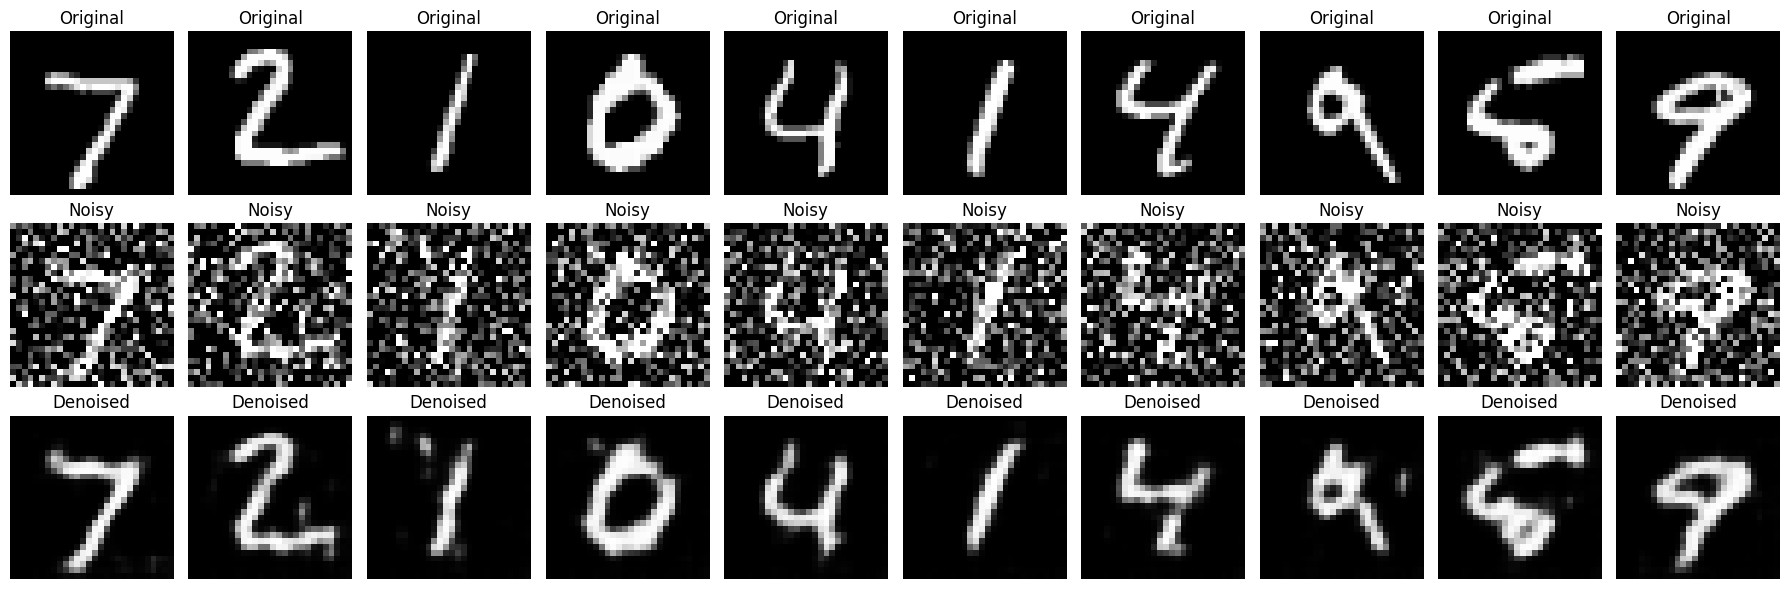

In [20]:
# Run training and visualization
train(model, train_loader, criterion, optimizer, epochs=5)
visualize_denoising(model, test_loader)